Acceptable quality calls (PESQ ≥ 3.0):
  Non-Tor: 82.22%
  Tor:     14.66%

Non-Tor PESQ MOS Percentiles:
  25th percentile: 3.30
  Median (50th):   3.51
  75th percentile: 3.61

Tor PESQ MOS Percentiles:
  25th percentile: 1.83
  Median (50th):   2.29
  75th percentile: 2.77



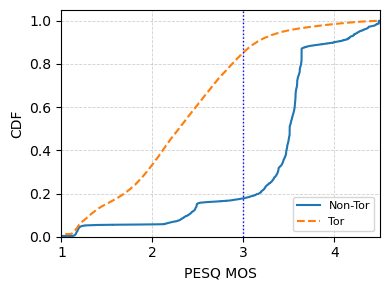

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === FILE PATHS ===
file_non_tor = "../../data/final-non-tor.csv"
file_tor = "../../data/final-tor.csv"

# === READ CSVs ===
df_non_tor = pd.read_csv(file_non_tor, sep=",")
df_tor = pd.read_csv(file_tor, sep=",")

# === COMBINE PESQ MOS COLUMNS ===
pesq_non_tor = pd.concat([df_non_tor['caller_pesq_mos'], df_non_tor['callee_pesq_mos']], ignore_index=True).dropna()
pesq_tor = pd.concat([df_tor['caller_pesq_mos'], df_tor['callee_pesq_mos']], ignore_index=True).dropna()

# === THRESHOLD STATS ===
threshold = 3.0
good_non_tor = (pesq_non_tor >= threshold).mean() * 100
good_tor = (pesq_tor >= threshold).mean() * 100

print(f"Acceptable quality calls (PESQ ≥ {threshold}):")
print(f"  Non-Tor: {good_non_tor:.2f}%")
print(f"  Tor:     {good_tor:.2f}%\n")

def describe_percentiles(data, label):
    p25 = np.percentile(data, 25)
    p50 = np.percentile(data, 50)
    p75 = np.percentile(data, 75)
    print(f"{label} PESQ MOS Percentiles:")
    print(f"  25th percentile: {p25:.2f}")
    print(f"  Median (50th):   {p50:.2f}")
    print(f"  75th percentile: {p75:.2f}\n")
    return p50

describe_percentiles(pesq_non_tor, "Non-Tor")
describe_percentiles(pesq_tor, "Tor")

# === COMPUTE CDFs ===
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    return sorted_data, cdf

non_tor_sorted, non_tor_cdf = compute_cdf(pesq_non_tor)
tor_sorted, tor_cdf = compute_cdf(pesq_tor)

# === PLOT CDF ===
fig, ax = plt.subplots(figsize=(4, 3))  # 1-column width

ax.plot(non_tor_sorted, non_tor_cdf, label="Non-Tor", linewidth=1.5)
if len(tor_sorted) > 0:
    ax.plot(tor_sorted, tor_cdf, label="Tor", linewidth=1.5, linestyle="--")

# === Threshold Line ===
ax.axvline(x=3.0, linestyle=':', color='blue', linewidth=1.0)

# === Labels, Grid, Legend ===
ax.set_xlabel("PESQ MOS")
ax.set_ylabel("CDF")
ax.set_xticks(np.arange(1.0, 4.6, 1.0))
ax.set_xlim(1.0, 4.5)
ax.set_ylim(0, 1.05)
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
ax.legend(loc="lower right", fontsize=8)

plt.tight_layout()
plt.savefig("pesq_cdf_plot.pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()
